# 💬 **Twitter Sentiment Analysis (Natural Language Processing)**

Authors:
1. Patrick Maina (Team Leader)

2. Christine Ndungu

3. George Nyandusi

4. Teresia Njoki

## **1. 💼 Business Understanding**
### **1.1. Introduction**
Customer sentiment plays a significant role in shaping public perception and guiding product development for tech giants like Apple and Google. By analyzing public opinions through tweets on Twitter, entities can identify trends, gauge satisfaction, and respond to customer needs more effectively. In light of this, this project aims to build a sentiment analysis model that classifies Tweets about Apple and Google products into sentiment categories (positive, negative and neutral sentiments).

### **1.2. Problem Statement**
Apple and Google, two of the world's leading tech companies, heavily depend on public perception to maintain their market positions and customer trust. As consumers increasingly voice their opinions on platforms like Twitter, understanding these sentiments has become very paramount for brand management, product development, and customer engagement strategies. This has therefore led to the need to develop algorithms that can provide sentiments for various opinions from users.

### **1.3. Objectives**
The main objectives of this project are:
- To apply **text preprocessing and vectorization** techniques to prepare the Twitter data for effective model training.

- To develop a **binary sentiment** classifier to distinguish between positive and negative tweets, as a baseline.

- To extend the model to a **multiclass classifier**, that includes the neutral class.

- To evaluate classifier performance using appropriate metrics such as F1-score, precision and recall, particularly for imbalanced classes.
- To provide actionable data-driven insights and recommendations.

## **2. 📊 Data Understanding**
In this step, we will explore the dataset to understand the kind of information it contains, the different features and their data types, as well as checking for things like missing values or unusual patterns. This will help us get a clear picture of the data before moving on to cleaning, preprocessing and vectorization.

The dataset contains the following features:
- `tweet_text`: This is the actual content of the tweet. It is the main text input used for sentiment classification.

- `emotion_in_tweet_is_directed_at`: This specifies the tatget of the emotion expressed in the tweet (e.g., Apple, Google)

- `is_there_an_emotion_directed_at_a_brand_or_product`: This indicates whether the tweet expresses an emotion directed at a brand or product. It serves as the label for classification.

### **2.1. Import Libraries**
For this project, we will implement the following tools and libraries:
- `Numpy`: for numerical computations

- `Pandas`: for data loading, cleaning and manipulation

- `Seaborn`: for data visualization and EDA

- `Matplotlib`: for data visualization and EDA

- `Plotly`: for interactive visualizations

- `Scikit-Learn`: for data preprocessing, predictive modeling and model evaluation

- `Imblearn`: for handling class imbalance

- `NLTK`: the Natural Language Toolkit for Natural Language Processing tasks

- `Re`: The Regex library for text cleaning and manipulation.

In [1]:
# import required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier

# visualization libraries
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.colors as pc
import matplotlib.pyplot as plt
import seaborn as sns

# set visualization style
sns.set(style="whitegrid")

# nltk imports
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/patrick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/patrick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/patrick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/patrick/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### **2.2. Data Loading and Inspection**
In this section, we will load the dataset, and check the info, as well as the summary statistics.

In [2]:
# load the dataset
tweet_df = pd.read_csv('data/twitter_data.csv', encoding='latin-1')

# display the first few rows of the dataset
tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
# check the dataset info
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


From the `info()` function, we can note the following:
- The dataset contains a total of `9093` records, and 3 columns/features.

- All the columns are of the `object` data type

In order to understand the columns better, and for ease of readability, we will rename the columns to give the data more meaning.

In [4]:
# rename the columns in the dataset
def rename_columns(df):
    df.columns = ['tweet', 'tweet_directed_at', 'sentiment']
    return df

tweet_df = rename_columns(tweet_df)
tweet_df.head()

,tweet,tweet_directed_at,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In the sentiment column, we can check the different classes (sentiments), as well as their respective counts.

In [5]:
# check the unique values in 'sentiment'
tweet_df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

From the above cell, we have four distinct classes namely:
- `Positive emotion`

- `Negative emotion`

- `No emotion toward the brand or product`

- `I can't tell`

The last two classes are not distict classes per se, so we can combine the two classes to create one single class (`Neutral emotion`), making the number of classes 3 in total.

In [6]:
# combine the 'No emotion toward brand or product' and 'No emotion toward brand or product' into a single category
tweet_df['sentiment'] = tweet_df['sentiment'].replace(
    {
        "No emotion toward brand or product": "Neutral emotion",
        "I can't tell": "Neutral emotion",
    }
)

# check the unique values in the sentiment column
print("Unique Sentiments:")
print(tweet_df['sentiment'].unique())

Unique Sentiments:
['Negative emotion' 'Positive emotion' 'Neutral emotion']


Next, we will check for missing values and duplicate values in our dataset.

In [7]:
# check for missing values, and express as a percentage
missing_values = tweet_df.isna().sum() / len(tweet_df) * 100
print("Missing Values (%):")
print(missing_values)
# tweet_df.isna().sum()

Missing Values (%):
tweet                 0.010997
tweet_directed_at    63.807324
sentiment             0.000000
dtype: float64


We have a very huge number of missing values in the `tweet_directed_at` column. Since this column is not very significant in the modeling process, we will drop it entirely.

In [8]:
# fill the missing values in 'tweet_directed_at' column with 'Not directed'
tweet_df['tweet_directed_at'].fillna('Not directed', inplace=True)
# tweet_df.drop(columns=['tweet_directed_at'], inplace=True)

# drop the missing value in 'tweet' column
tweet_df.dropna(subset=['tweet'], inplace=True, axis=0)

# check again for missing values
tweet_df.isna().sum()

tweet                0
tweet_directed_at    0
sentiment            0
dtype: int64

In this section, we check for duplicate rows in the dataset

In [9]:
# check for duplicate values
tweet_df.duplicated().sum()

np.int64(22)

We have 22 duplicate rows in the data. We will drop the duplicate rows entirely.

In [10]:
# drop the duplicate rows
tweet_df.drop_duplicates(inplace=True)
tweet_df.duplicated().sum()

np.int64(0)

Next, we will check the summary statistics of the data.

In [11]:
tweet_df.describe()

,tweet,tweet_directed_at,sentiment
count,9070,9070,9070
unique,9065,10,3
top,RT @mention RT @mention It's not a rumor: Appl...,Not directed,Neutral emotion
freq,2,5788,5531


### **2.3. Exploratory Data Analysis**
In this section, we will perform a systematic investigation of the dataset to extract insights, evaluate feature distributions, assess the relationship between the feature and target variables, and identify anomalies, outliers or data quality issues. This will guide the selection of appropriate modeling techniques.

### **2.3.1. Dataset Overview**
In this section, we get a general overview of the dataset, including the shape, number of tweets, number of features and column info.

In [12]:
# Basic dataset overview
print("Dataset Overview")
print("=" * 50)
print(f"Dataset shape: {tweet_df.shape}")
print(f"Number of tweets: {len(tweet_df)}")
print(f"Number of features: {len(tweet_df.columns)}")
print(f"Memory usage: {tweet_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn Information:")
print("-" * 30)
for col in tweet_df.columns:
    print(f"• {col}: {tweet_df[col].dtype}")

print("\nDataset Info:")
tweet_df.info()

print("\nFirst few rows:")
tweet_df.head(10)

Dataset Overview
Dataset shape: (9070, 3)
Number of tweets: 9070
Number of features: 3
Memory usage: 2.54 MB

Column Information:
------------------------------
• tweet: object
• tweet_directed_at: object
• sentiment: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet              9070 non-null   object
 1   tweet_directed_at  9070 non-null   object
 2   sentiment          9070 non-null   object
dtypes: object(3)
memory usage: 283.4+ KB

First few rows:


,tweet,tweet_directed_at,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,Not directed,Neutral emotion
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion


### **2.3.2. Sentiment Distribution Analysis**
In this section, we will look at the distribution of the unique values in the `sentiment` column.

In [13]:
# Sentiment Distribution Analysis
print("Sentiment Distribution Analysis")
print("=" * 40)

# Count unique sentiment values
sentiment_counts = tweet_df['sentiment'].value_counts()
print("Sentiment Categories:")
print(sentiment_counts)

# Calculate percentages
sentiment_percentages = tweet_df['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Distribution (%):")
print(sentiment_percentages.round(2))

Sentiment Distribution Analysis
Sentiment Categories:
sentiment
Neutral emotion     5531
Positive emotion    2970
Negative emotion     569
Name: count, dtype: int64

Sentiment Distribution (%):
sentiment
Neutral emotion     60.98
Positive emotion    32.75
Negative emotion     6.27
Name: proportion, dtype: float64


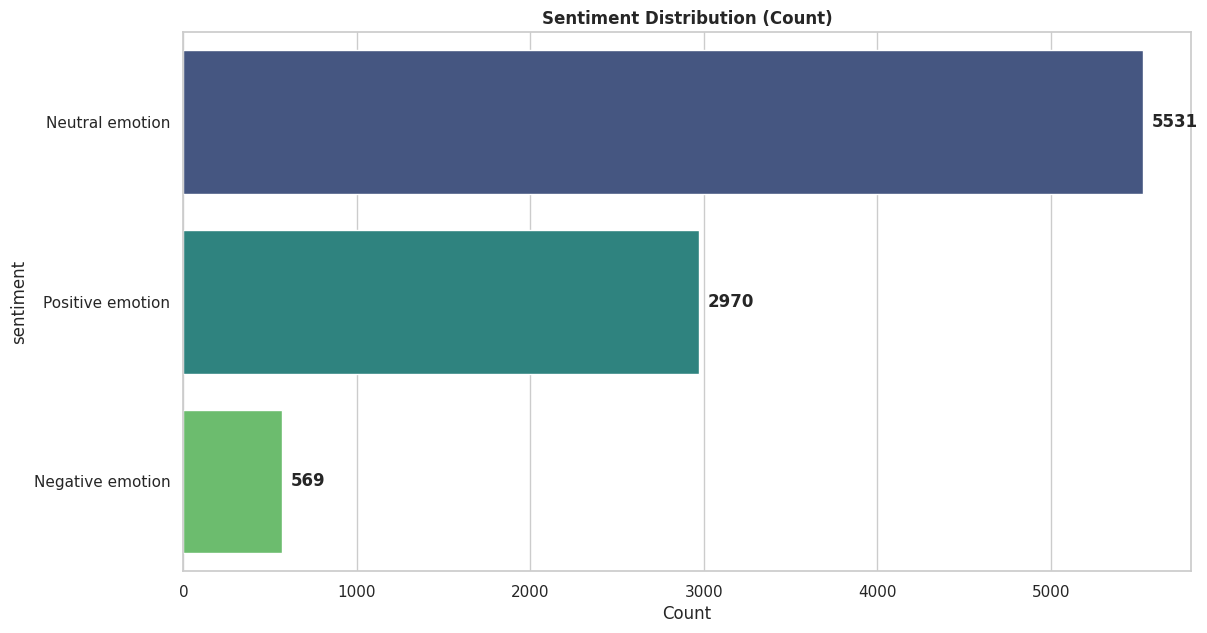

In [14]:
# Visualize sentiment distribution
plt.figure(figsize=(13, 7))

# Plot 1: Count plot
# plt.subplot(2, 3, 1)
ax = sns.countplot(data=tweet_df, y='sentiment', order=sentiment_counts.index, palette='viridis')
plt.title('Sentiment Distribution (Count)', fontsize=12, fontweight='bold')
plt.xlabel('Count')
for i, v in enumerate(sentiment_counts.values):
    ax.text(v + 50, i, str(v), va='center', fontweight='bold')

From the plot, out of the 9070 tweets in the dataset, `5531` tweets express a neutral emotion, which is about `60.98%` of the total tweets, `2970` tweets express a positive emotion, which is about `32.75%` of the total tweets, and `569` tweets express a negative emotion, which is about `6.27%` of the total tweets. This indicates that the sentiment(target) column is **highly imbalanced**. This imbalance can negatively impact the performance of the prediction model by influencing the model to make false predictions. Therefore, the class imbalance will be handles before modeling.

### **2.3.3. Tweet Destination distribution**
In this section, we will look at the distribution of the various entities in which these tweets are directed to. This will aid in knowing how the tweets are distributed across different brands and products, helping us understand:

- **Brand focus and market share** - Which entities (Apple, Google, iPhone, etc.) receive the most social media attention

- **Sentiment patterns by destination** - How different brands/products are perceived by users

- **Data balance assessment** - Whether we have sufficient data for meaningful analysis across different entities

- **Competitive insights** - Relative discussion volume between Apple and Google products

- **Targeted analysis opportunities** - Identifying which brands/products warrant deeper sentiment investigation

This analysis will guide our modeling approach and help generate actionable business insights for brand management and product development strategies.

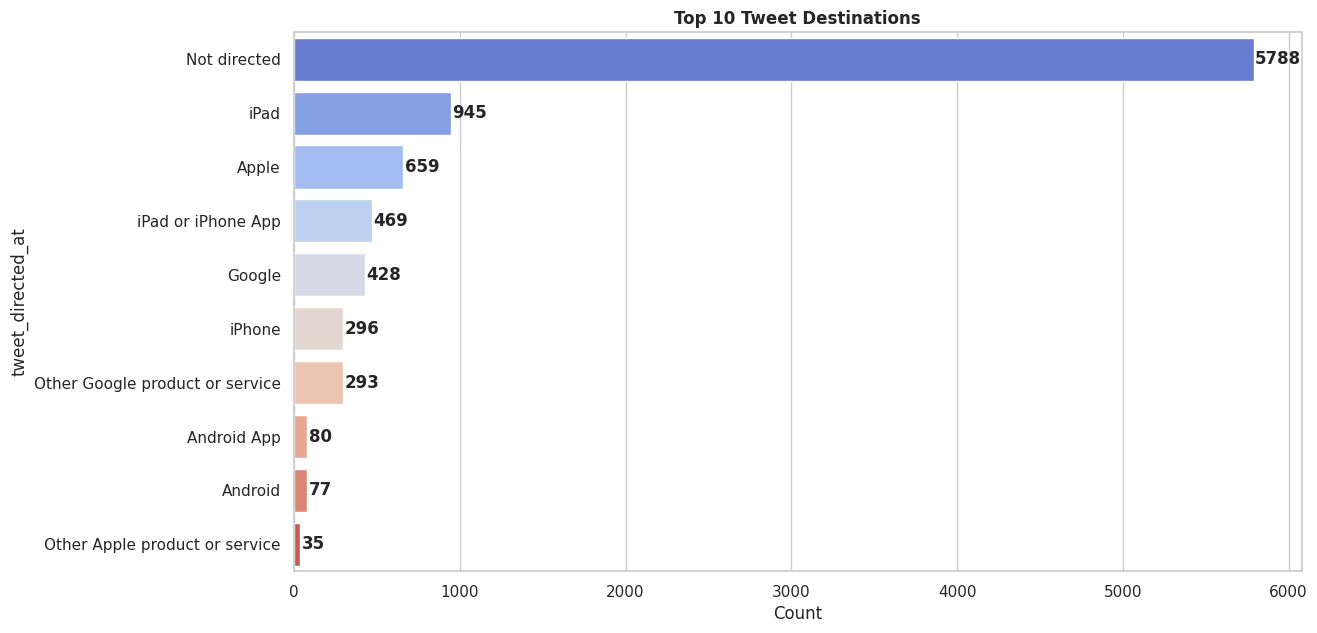

In [17]:
# Plot 2: Tweet destination distribution
plt.figure(figsize=(13, 7))
tweet_dest_counts = tweet_df['tweet_directed_at'].value_counts().head(10)
ax = sns.barplot(x=tweet_dest_counts.values, y=tweet_dest_counts.index, palette='coolwarm')
plt.title('Top 10 Tweet Destinations', fontsize=12, fontweight='bold')
plt.xlabel('Count')
for i, v in enumerate(tweet_dest_counts.values):
    ax.text(v + 10, i, str(v), va='center', fontweight='bold')

From the plot above, we observe that the majority of tweets are not directed at any specific brand or product, with "Not directed" being the most frequent category. Among the directed tweets, "iPad," "Apple," and "iPad or iPhone App" receive the highest number of mentions, followed by "Google" and "iPhone." This indicates that Apple-related products and services dominate the conversation in the dataset, while Google and its products receive comparatively fewer mentions. Overall, the data shows a strong focus on Apple within the top tweet destinations.

### **2.3.4. Sentiment by Tweet destination**
The sentiment by tweet destination plot helps us understand how people feel about different brands or products. It shows the proportion of positive, negative, and neutral tweets for each major destination (like Apple, Google, iPhone, etc.). This allows us to:

- Compare public perception of different brands/products.

- Identify which brands/products receive more positive or negative feedback.

- Spot areas where a brand or product may need improvement or is performing well.

- Guide business and marketing strategies based on how sentiment varies across destinations.

In [ ]:
# Plot 4: Sentiment by tweet destination using Plotly

# Prepare data
top_destinations = tweet_df['tweet_directed_at'].value_counts().head(5).index
filtered_df = tweet_df[tweet_df['tweet_directed_at'].isin(top_destinations)]
sentiment_dest = pd.crosstab(filtered_df['tweet_directed_at'], filtered_df['sentiment'])

# Create stacked bar chart
fig = go.Figure()

for sentiment in sentiment_dest.columns:
    fig.add_trace(go.Bar(
        x=sentiment_dest.index,
        y=sentiment_dest[sentiment],
        name=sentiment,
        text=sentiment_dest[sentiment],
        textposition='auto'
    ))

fig.update_layout(
    barmode='stack',
    title='Sentiment by Top 5 Destinations',
    xaxis_title='Tweet Destination',
    yaxis_title='Count',
    legend_title='Sentiment',
    xaxis_tickangle=-45,
    template='plotly_white',
    width=1200,
    height=800
)

fig.show()

In [26]:
# Plot 5: Sentiment proportions by destination
# plt.figure(figsize=(13, 7))
# sentiment_dest_pct = pd.crosstab(filtered_df['tweet_destination'], 
#                                 filtered_df['sentiment'], normalize='index') * 100
# sentiment_dest_pct.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='plasma')
# plt.title('Sentiment Proportions by Destination', fontsize=12, fontweight='bold')
# plt.xlabel('Tweet Destination')
# plt.ylabel('Percentage')
# plt.xticks(rotation=45)
# plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Calculate sentiment proportions by destination
# sentiment_dest_pct = pd.crosstab(
#     filtered_df['tweet_directed_at'],
#     filtered_df['sentiment'],
#     normalize='index'
# ) * 100

# # Create interactive stacked bar chart
# fig = go.Figure()

# for sentiment in sentiment_dest_pct.columns:
#     fig.add_trace(go.Bar(
#         x=sentiment_dest_pct.index,
#         y=sentiment_dest_pct[sentiment],
#         name=sentiment,
#         text=sentiment_dest_pct[sentiment].round(1).astype(str) + '%',
#         textposition='auto'
#     ))

# fig.update_layout(
#     barmode='stack',
#     title='Sentiment Proportions by Destination',
#     xaxis_title='Tweet Destination',
#     yaxis_title='Percentage',
#     legend_title='Sentiment',
#     xaxis_tickangle=-45,
#     template='plotly_white',
#     width=1200,
#     height=800
# )

# fig.show()

# Create interactive stacked bar chart with custom colors

# Define custom colors for each sentiment
sentiment_colors = {
    'Positive emotion': '#2ecc71',   # green
    'Negative emotion': '#e74c3c',   # red
    'Neutral emotion':  '#f1c40f'    # yellow
}

fig = go.Figure()

for sentiment in sentiment_dest_pct.columns:
    fig.add_trace(go.Bar(
        x=sentiment_dest_pct.index,
        y=sentiment_dest_pct[sentiment],
        name=sentiment,
        text=sentiment_dest_pct[sentiment].round(1).astype(str) + '%',
        textposition='auto',
        marker_color=sentiment_colors.get(sentiment, None)
    ))

fig.update_layout(
    barmode='stack',
    title='Sentiment Proportions by Destination',
    xaxis_title='Tweet Destination',
    yaxis_title='Percentage',
    legend_title='Sentiment',
    xaxis_tickangle=-45,
    template='plotly_white',
    width=1200,
    height=800
)

fig.show()

The `Sentiment Proportions by Destination` plot shows the percentage distribution of negative, neutral, and positive sentiments for the top 5 tweet destinations: `Apple`, `Google`, `Not directed`, `iPad`, and `iPad or iPhone App.`

- Apple, iPad, and iPad or iPhone App** have a high proportion of positive sentiment (over 80%), with relatively low negative and neutral sentiments.

- Google also has a strong positive sentiment (about 80%), but slightly higher negative and neutral proportions compared to Apple-related products.

- Not directed tweets are overwhelmingly neutral (over 93%), with very few positive or negative sentiments.

This indicates that tweets directed at specific Apple and Google products are mostly positive, while tweets not directed at any brand are predominantly neutral.

([0, 1, 2],
 [Text(0, 0, 'Negative emotion'),
  Text(1, 0, 'Positive emotion'),
  Text(2, 0, 'Neutral')])

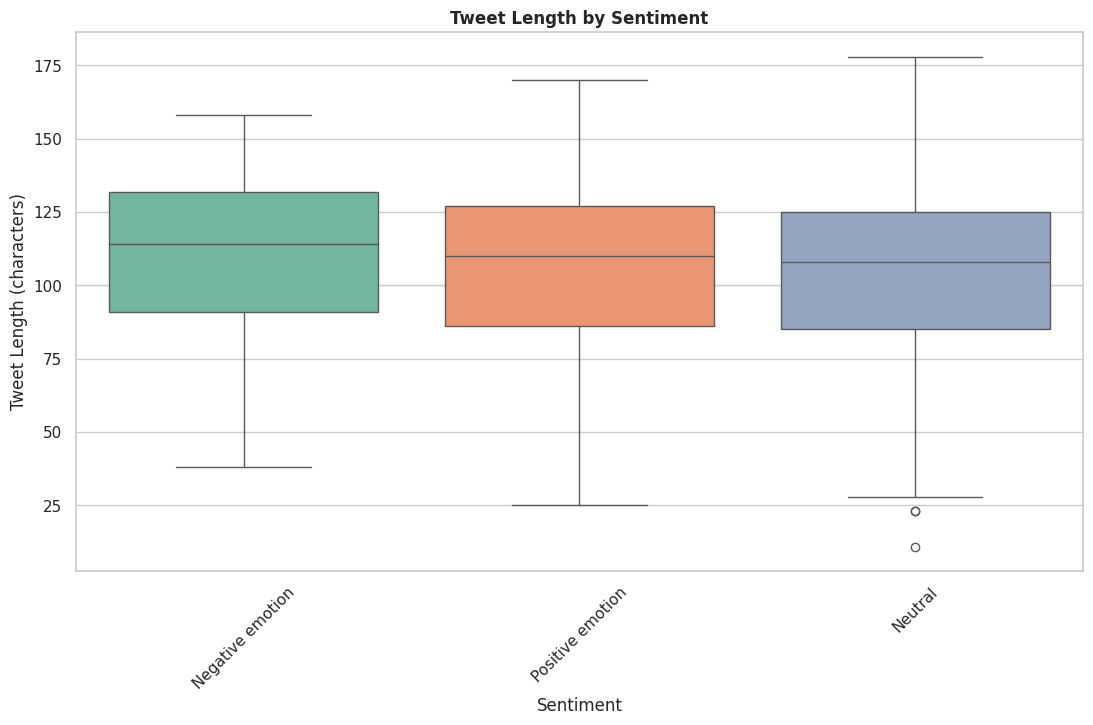

In [16]:
# Plot 6: Tweet length distribution by sentiment
plt.figure(figsize=(13, 7))
tweet_df['tweet_length'] = tweet_df['tweet'].str.len()
sns.boxplot(data=tweet_df, x='sentiment', y='tweet_length', palette='Set2')
plt.title('Tweet Length by Sentiment', fontsize=12, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.xticks(rotation=45)

In [17]:
# Basic text statistics
def generate_columns(df):
    df['chars'] = df['tweet'].apply(len)
    df['words'] = df['tweet'].apply(lambda x: nltk.word_tokenize(x)).apply(len)
    df['sentences'] = df['tweet'].apply(lambda x: nltk.sent_tokenize(x)).apply(len)
    return df
tweet_df = generate_columns(tweet_df)
tweet_df.head()

,tweet,tweet_destination,sentiment,tweet_length,chars,words,sentences
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,127,32,5
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,139,29,3
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,79,20,2
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,82,21,2
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,131,29,1


Text(0, 0.5, 'Frequency')

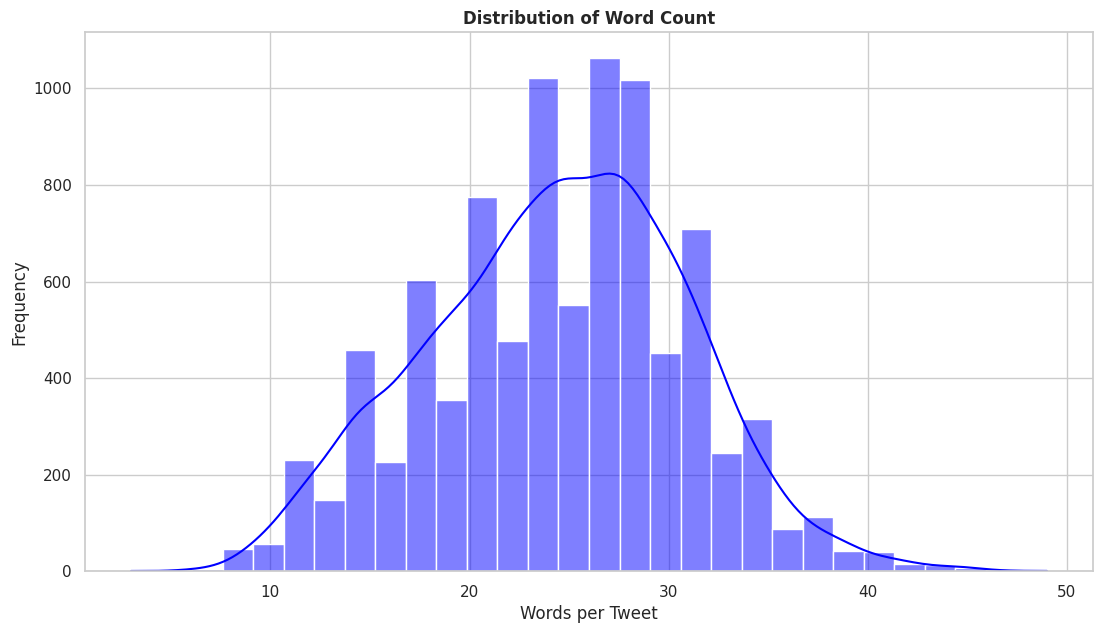

In [18]:
# Plot 1: Word count distribution
plt.figure(figsize=(13, 7))
sns.histplot(data=tweet_df, x='words', bins=30, kde=True, color='blue')
plt.title('Distribution of Word Count', fontweight='bold')
plt.xlabel('Words per Tweet')
plt.ylabel('Frequency')

([0, 1, 2],
 [Text(0, 0, 'Negative emotion'),
  Text(1, 0, 'Positive emotion'),
  Text(2, 0, 'Neutral')])

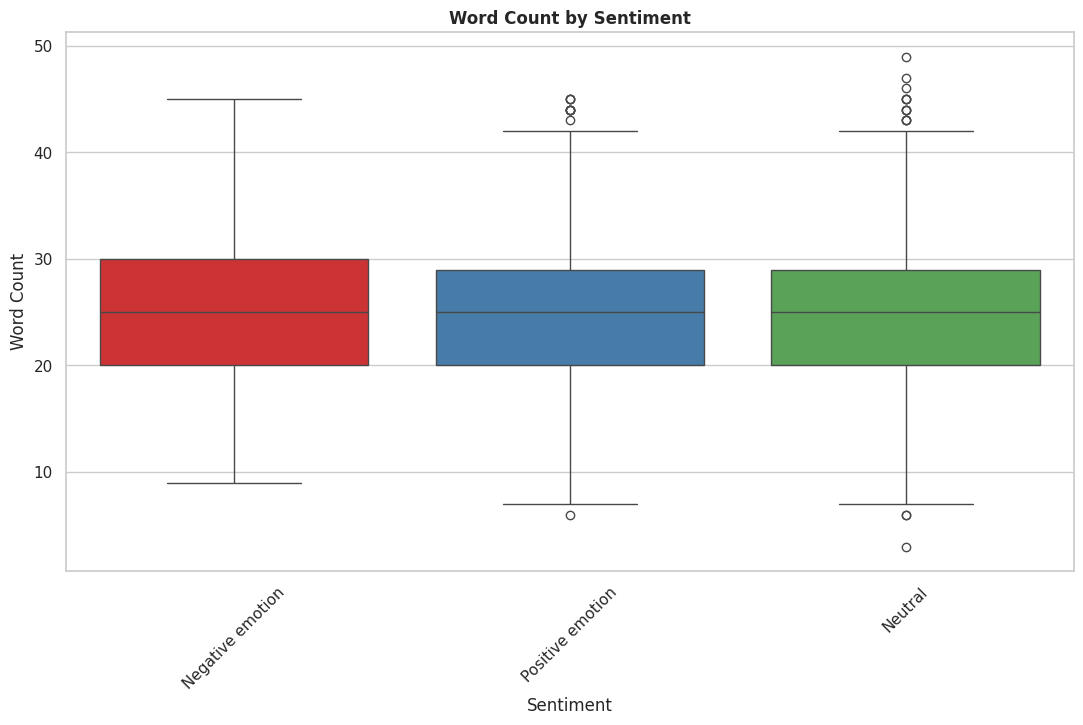

In [19]:
# Plot 2: Word count by sentiment
plt.figure(figsize=(13, 7))
sns.boxplot(data=tweet_df, x='sentiment', y='words', palette='Set1')
plt.title('Word Count by Sentiment', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.xticks(rotation=45)

Text(0, 0.5, 'Frequency')

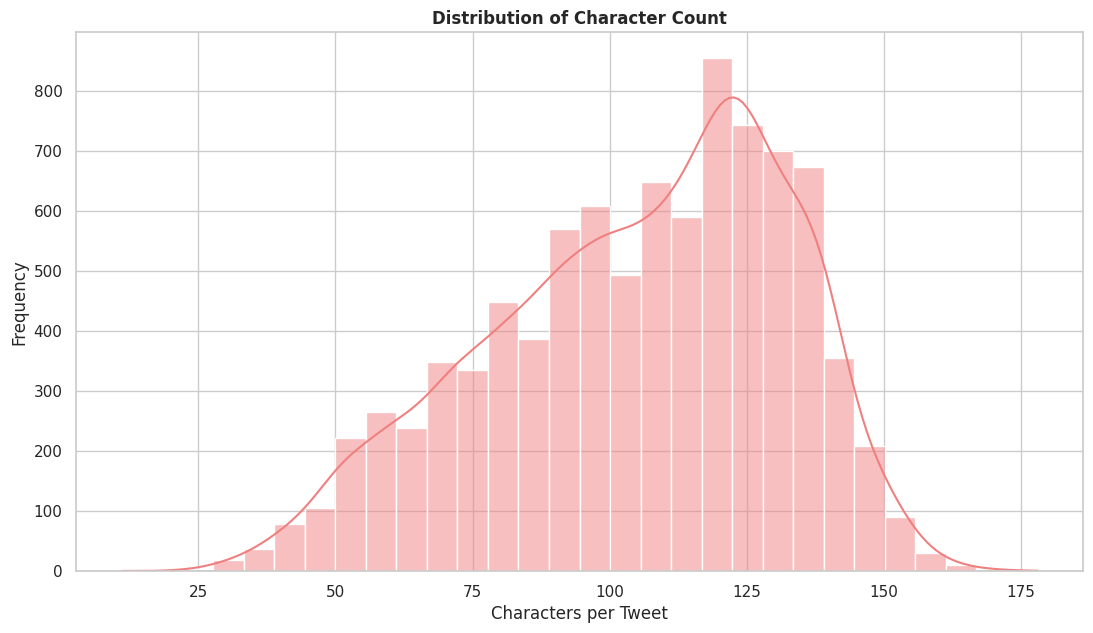

In [20]:
# Plot 3: Character count distribution
plt.figure(figsize=(13, 7))
sns.histplot(data=tweet_df, x='chars', bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Character Count', fontweight='bold')
plt.xlabel('Characters per Tweet')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

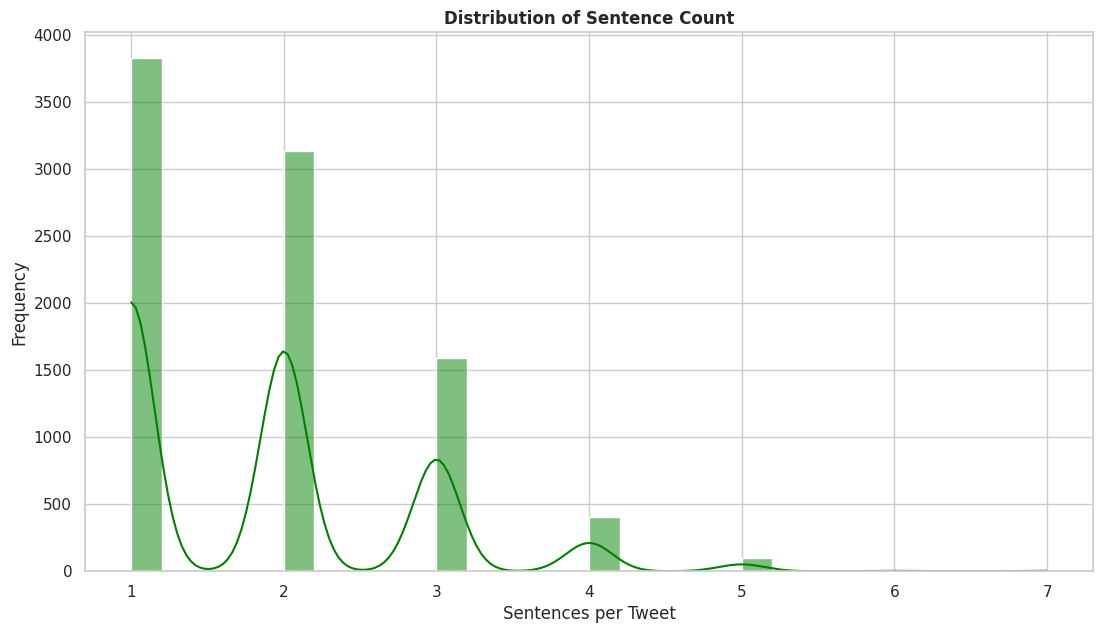

In [21]:
# sentence count distribution
plt.figure(figsize=(13, 7))
sns.histplot(data=tweet_df, x='sentences', bins=30, kde=True, color='green')
plt.title('Distribution of Sentence Count', fontweight='bold')
plt.xlabel('Sentences per Tweet')
plt.ylabel('Frequency')

Text(0, 0.5, 'Sentence Count')

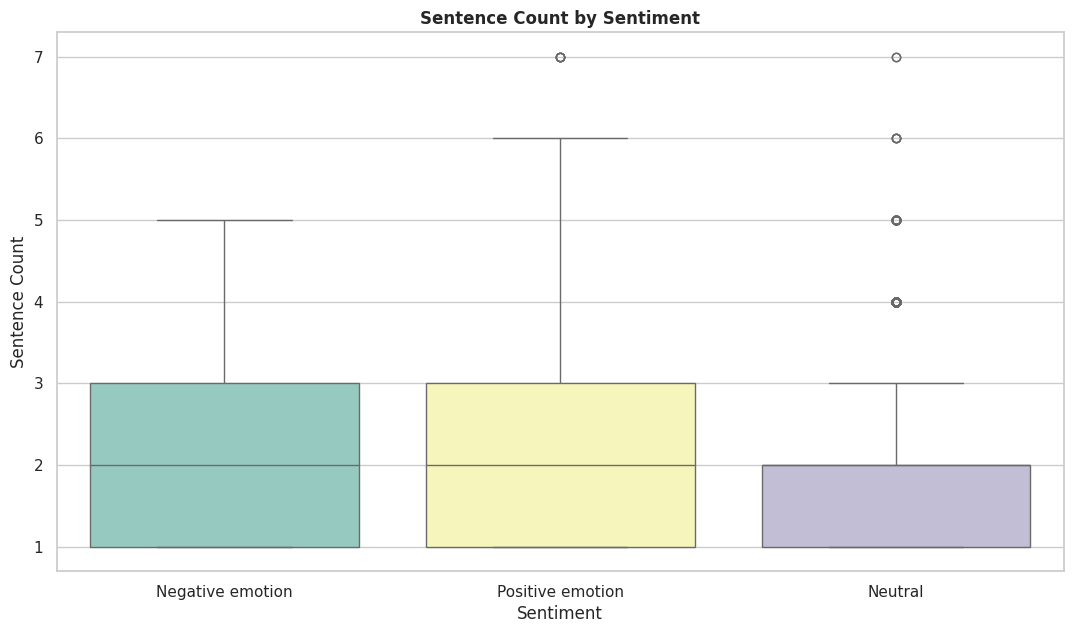

In [22]:
# sentence count by sentiment
plt.figure(figsize=(13, 7))
sns.boxplot(data=tweet_df, x='sentiment', y='sentences', palette='Set3')
plt.title('Sentence Count by Sentiment', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Sentence Count')

## Data Cleaning and Preprocessing

In [23]:
class TweetPreprocessor(BaseEstimator, TransformerMixin):
    """
    A preprocessing class for Twitter Sentiment Analysis.

    This class handles:
    - Data cleaning (removing URLs, mentions, hashtags, special characters)
    - Text preprocessing (tokenization, lemmatization, stop words removal)
    - Feature extraction using TF-IDF or Count Vectorization

    This class can be implemented directly in a scikit-learn pipeline
    """

    def __init__(self,
                 remove_urls=True,
                 remove_mentions=True,
                 remove_hashtags=True,
                 remove_stopwords=True,
                 lemmatize=True,
                 lowercase=True,
                 min_length=2,
                 expand_contractions=True,  # New feature
                 remove_repeated_chars=True,  # New feature
                 tfidf_max_features=15000,
                 tfidf_ngram_range=(1, 3),
                 tfidf_min_df=3,
                 tfidf_max_df=0.85,
                 use_tfidf=True):
        """
        Initialize the TweetPreprocessor.

        Parameters:
        -----------
        remove_urls : bool, default=True
            Whether to remove URLs from tweets
        remove_mentions : bool, default=True
            Whether to remove @mentions from tweets
        remove_hashtags : bool, default=True
            Whether to remove #hashtags from tweets (often contain sentiment info)
        remove_stopwords : bool, default=True
            Whether to remove stop words
        lemmatize : bool, default=True
            Whether to lemmatize words
        lowercase : bool, default=True
            Whether to convert text to lowercase
        min_length : int, default=2
            Minimum word length to keep
        tfidf_max_features : int, default=10000
            Maximum number of features for TF-IDF
        tfidf_ngram_range : tuple, default=(1, 2)
            N-gram range for TF-IDF
        tfidf_min_df : int, default=2
            Minimum document frequency for TF-IDF
        tfidf_max_df : float, default=0.95
            Maximum document frequency for TF-IDF
        """
        self.remove_urls = remove_urls
        self.remove_mentions = remove_mentions
        self.remove_hashtags = remove_hashtags
        self.remove_stopwords = remove_stopwords
        self.lemmatize = lemmatize
        self.lowercase = lowercase
        self.min_length = min_length
        self.expand_contractions = expand_contractions
        self.remove_repeated_chars = remove_repeated_chars
        self.tfidf_max_features = tfidf_max_features
        self.tfidf_ngram_range = tfidf_ngram_range
        self.tfidf_min_df = tfidf_min_df
        self.tfidf_max_df = tfidf_max_df
        self.use_tfidf = use_tfidf

        # initialize the components
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.vectorizer = None

        # Contraction mapping
        self.contractions = {
            "won't": "will not", "can't": "cannot", "n't": " not",
            "'re": " are", "'ve": " have", "'ll": " will",
            "'d": " would", "'m": " am", "it's": "it is",
            "that's": "that is", "what's": "what is",
            "there's": "there is", "here's": "here is"
        }

    def expand_contractions_text(self, text):
        """Expand contractions in text"""
        if not self.expand_contractions:
            return text
        
        for contraction, expansion in self.contractions.items():
            text = text.replace(contraction, expansion)
        return text
    
    def remove_repeated_characters(self, text):
        """Remove repeated characters (e.g., 'goooood' -> 'good')"""
        if not self.remove_repeated_chars:
            return text
        
        # Replace 3+ repeated characters with 2
        return re.sub(r'(.)\1{2,}', r'\1\1', text)
    
    # data cleaning function
    def clean_text(self, text):
        """
        Cleans individual tweet text

        Parameters:
        -----------
        text: str
            The tweet text to clean
        """

        # return empty string if text is NaN
        if pd.isna(text):
            return ''
        
        # convert to string if not already
        text = str(text)

         # Expand contractions first
        text = self.expand_contractions_text(text)
        
        # Remove repeated characters
        text = self.remove_repeated_characters(text)

        # remove URLs
        if self.remove_urls:
            text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # remove mentions
        if self.remove_mentions:
            text = re.sub(r'@\w+', '', text)

        # remove hashtags (but keep the text)
        if self.remove_hashtags:
            text = re.sub(r'#', '', text)

        # remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s!?]', '', text)

        # Convert multiple exclamation/question marks to single
        text = re.sub(r'!+', '!', text)
        text = re.sub(r'\?+', '?', text)

        # remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text
    
    # text preprocessing function
    def preprocess_text(self, text):
        """
        Preprocesses the cleaned text (tokenization, lemmatization, stop words removal)
        
        Parameters:
        -----------
        text: str
            The cleaned tweet text to preprocess

        Returns:
        --------
        str
            The preprocessed tweet text
        """

        # return an empty string if not text
        if not text:
            return ''
        
        # convert text to lowercase
        if self.lowercase:
            text = text.lower()

        # tokenize the text
        tokens = word_tokenize(text)

        # remove stop words and short words
        if self.remove_stopwords:
            tokens = [token for token in tokens
                      if token not in self.stop_words and len(token) >= self.min_length]
        else:
            tokens = [token for token in tokens if len(token) >= self.min_length]

        # lemmatize the tokens
        if self.lemmatize:
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens]

        return ' '.join(tokens)
    
    # function to fit the vectorizer
    def fit(self, X, y=None):
        """
        Fit the preprocessor to the data

        Parameters:
        -----------
        X: array-like
           Input tweets
        y: array-like, optional
           Target labels

        Returns:
        --------
        self
        """

        # clean and preprocess the tweets
        processed_texts = []
        for text in X:
            cleaned = self.clean_text(text)
            preprocessed = self.preprocess_text(cleaned)
            processed_texts.append(preprocessed)

        # fit the TF-IDF vectorizer
        if self.use_tfidf:
            self.vectorizer = TfidfVectorizer(
                max_features=self.tfidf_max_features,
                ngram_range=self.tfidf_ngram_range,
                min_df=self.tfidf_min_df,
                max_df=self.tfidf_max_df,
                stop_words='english',
                sublinear_tf=True,
                norm='l2',
                use_idf=True
            )
        else:
            self.vectorizer = CountVectorizer(
                max_features=self.tfidf_max_features,
                ngram_range=self.tfidf_ngram_range,
                min_df=self.tfidf_min_df,
                max_df=self.tfidf_max_df,
                stop_words='english'
            )
        self.vectorizer.fit(processed_texts)

        return self
    
    # function to transform the data
    def transform(self, X):
        """
        Transform the input data using the fitted vectorizer

        Parameters:
        -----------
        X: array-like
           Input tweets

        Returns:
        --------
        scipy.sparse matrix
            TF-IDF transformed features
        """

        # check for fitted vectorizer
        if self.vectorizer is None:
            raise ValueError("Preprocessor has not been fitted yet. Call fit() first.")

        # process all the tweets
        processed_texts = []
        for text in X:
            cleaned = self.clean_text(text)
            preprocessed = self.preprocess_text(cleaned)
            processed_texts.append(preprocessed)

        # transform using the fitted vectorizer
        return self.vectorizer.transform(processed_texts)
    
    # fit_transform function
    def fit_transform(self, X, y=None):
        """
        Fit and transform the input data

        Parameters:
        -----------
        X: array-like
           Input tweets
        y: array-like, optional
            Target labels

        Returns:
        --------
        scipy.sparse matrix
            TF-IDF transformed features
        """
        return self.fit(X, y).transform(X)
    
    # function to get feature names
    def get_feature_names_out(self, input_features=None):
        """
        Get the feature names of the transformed output
        
        Returns:
        --------
        array
            Feature names from the fitted vectorizer
        """
        if self.vectorizer is None:
            raise ValueError("Preprocessor has not been fitted yet. Call fit() first")
        
        return self.vectorizer.get_feature_names_out()
    
    # function to get the vocabulary
    def get_vocabulary(self):
        """
        Get the vocabulary dictionary.

        Returns:
        --------
        dict
            Vocabulary mapping from words to feature indices
        """

        if self.vectorizer is None:
            raise ValueError("Preprocessor has not been fitted yet. Call fit() first")
        
        return self.vectorizer.vocabulary_

## Modeling

First, we prepare our data by encoding the target column

In [24]:
# map sentiment labels
def map_sentiment(sentiment):
    if 'Negative' in sentiment:
        return 0
    elif 'Positive' in sentiment:
        return 1
    else:
        return 2 # neutral or other sentiment
    
# apply the mapping function to the sentiment column
tweet_df['sentiment_encoded'] = tweet_df['sentiment'].apply(map_sentiment)

# create a dataframe for binary classification (filter out the neutral/other cases)
binary_df = tweet_df[tweet_df['sentiment_encoded'] != 2].copy()
print(f"\nBinary Classification dataset shape: {binary_df.shape}")

# check the distribution
print("Sentiment Distribution After Mapping:")
print(binary_df['sentiment_encoded'].value_counts())


Binary Classification dataset shape: (3539, 8)
Sentiment Distribution After Mapping:
sentiment_encoded
1    2970
0     569
Name: count, dtype: int64


In [25]:
# define the X and y variables
X = binary_df['tweet']
y = binary_df['sentiment_encoded']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### Defining the Pipelines

In [61]:
# create different pipelines using our custom preprocessor class

# pipeline 1: Logistic regression (base model)
logistic_pipe = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)), # implements the Countvectorizer() method
    ('smote', SMOTE(random_state=42)),
    ('lgb_classifier', LogisticRegression(
        max_iter=1000, 
        random_state=42, 
        class_weight='balanced',
    ))
])

# pipeline 2: Random Forest classifier
rf_pipe = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('rf_classifier', RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        class_weight='balanced',
    ))
])

# pipeline 3: XGBoost classifier
xgb_pipe = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('xgb_classifier', XGBClassifier(
        n_estimators=200, 
        random_state=42,
    ))
])

# pipeline 4: Naive Bayes model
nb_pipe = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('nb_classifier', MultinomialNB())
])

# pipeline 5: Catboost Classifier
cat_pipe = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('cat_classifier', CatBoostClassifier(
        n_estimators=100,
        random_state=42,
        verbose=0
    ))
])

# pipeline 6: Gradient Boosting Classifier
# gb_pipe = Pipeline([
#     ('preprocessor', TweetPreprocessor(use_tfidf=False)),
#     ('smote', SMOTE(random_state=42)),
#     ('gb_classifier', GradientBoostingClassifier(
#         n_estimators=100,
#         random_state=42
#     ))
# ])

# store all the pipelines
pipelines = {
    'Logistic Regression': logistic_pipe,
    'Random Forest': rf_pipe,
    'XGBoost': xgb_pipe,
    'Naive Bayes': nb_pipe,
    'Catboost': cat_pipe,
    # 'Gradient Boosting': gb_pipe
}

print("Pipelines created successfully!")
for name in pipelines:
    print(f'- {name}')

Pipelines created successfully!
- Logistic Regression
- Random Forest
- XGBoost
- Naive Bayes
- Catboost


### Model Training and Evaluation

In [62]:
# train and evaluate all the pipelines
results = {}

# loop through each pipeline
for name, pipe in pipelines.items():
    print(f"\nTraining {name}...")

    # fit the pipeline
    pipe.fit(X_train, y_train)

    # make predictions
    y_pred = pipe.predict(X_test)

    # compute the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # store the results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    # display the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)
print(results_df)

# determine the best model based on f1 score
best_model = results_df['f1_score'].idxmax()
print(f"\nBest performing model: {best_model}")
print(f"Best f1 score: {results_df.loc[best_model, 'f1_score']:.4f}")


Training Logistic Regression...
Accuracy: 0.8277
Precision: 0.8427
Recall: 0.8277
F1 Score: 0.8341

Training Random Forest...
Accuracy: 0.8079
Precision: 0.8424
Recall: 0.8079
F1 Score: 0.8210

Training XGBoost...
Accuracy: 0.8715
Precision: 0.8577
Recall: 0.8715
F1 Score: 0.8595

Training Naive Bayes...
Accuracy: 0.8418
Precision: 0.8452
Recall: 0.8418
F1 Score: 0.8434

Training Catboost...
Accuracy: 0.8234
Precision: 0.8474
Recall: 0.8234
F1 Score: 0.8329
                     accuracy  precision  recall  f1_score
Logistic Regression    0.8277     0.8427  0.8277    0.8341
Random Forest          0.8079     0.8424  0.8079    0.8210
XGBoost                0.8715     0.8577  0.8715    0.8595
Naive Bayes            0.8418     0.8452  0.8418    0.8434
Catboost               0.8234     0.8474  0.8234    0.8329

Best performing model: XGBoost
Best f1 score: 0.8595


In [50]:
# # Visualize model performance comparison
# plt.figure(figsize=(12, 8))

# # Plot 1: Model comparison
# plt.subplot(2, 2, 1)
# metrics = ['accuracy', 'precision', 'recall', 'f1_score']
# x_pos = range(len(results_df))
# width = 0.2

# for i, metric in enumerate(metrics):
#     plt.bar([x + i * width for x in x_pos], results_df[metric], 
#             width, label=metric.replace('_', ' ').title())

# plt.xlabel('Models')
# plt.ylabel('Score')
# plt.title('Model Performance Comparison')
# plt.xticks([x + width * 1.5 for x in x_pos], results_df.index, rotation=45)
# plt.legend()
# plt.grid(True, alpha=0.3)

# # Plot 2: F1-Score comparison
# plt.subplot(2, 2, 2)
# plt.bar(results_df.index, results_df['f1_score'], color='skyblue', edgecolor='navy')
# plt.ylabel('F1-Score')
# plt.title('F1-Score Comparison')
# plt.xticks(rotation=45)
# plt.grid(True, alpha=0.3)

# # Plot 3: Confusion matrix for best model
# plt.subplot(2, 2, 3)
# best_pipeline_obj = pipelines[best_model]
# y_pred_best = best_pipeline_obj.predict(X_test)
# cm = confusion_matrix(y_test, y_pred_best)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=['Negative', 'Positive'],
#             yticklabels=['Negative', 'Positive'])
# plt.title(f'Confusion Matrix - {best_model}')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')

# # Plot 4: Model training time comparison (simulated)
# # plt.subplot(2, 2, 4)
# # # Simulate training times (in practice, you'd measure actual times)
# # training_times = {
# #     'Logistic Regression': 2.3,
# #     'Random Forest': 8.7,
# #     'Naive Bayes': 1.8,
# #     'SVM': 12.4
# # }
# # models = list(training_times.keys())
# # times = list(training_times.values())
# # plt.bar(models, times, color='lightcoral', edgecolor='darkred')
# # plt.ylabel('Training Time (seconds)')
# # plt.title('Estimated Training Time Comparison')
# # plt.xticks(rotation=45)
# # plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# # Print final summary
# print(f"Dataset size: {len(tweet_df)} tweets")
# print(f"Training set: {len(X_train)} tweets")
# print(f"Test set: {len(X_test)} tweets")
# print(f"Best model: {best_model}")
# print(f"Best F1-Score: {results_df.loc[best_model, 'f1_score']:.4f}")
# print(f"Best Accuracy: {results_df.loc[best_model, 'accuracy']:.4f}")

### Model Performance Visualization

In [ ]:
# use plotly for visualization

# Create interactive model performance comparison with Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Model Performance Comparison', 'F1-Score Comparison', 
                   f'Confusion Matrix - {best_model}', 'Model Metrics Overview'),
    specs=[[{"secondary_y": False}, {"type": "pie"}],
           [{"secondary_y": False}, {"type": "table"}]]
)

# Plot 1: Model comparison (grouped bar chart)
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    fig.add_trace(
        go.Bar(
            x=results_df.index,
            y=results_df[metric],
            name=metric.replace('_', ' ').title(),
            marker_color=colors[i],
            text=results_df[metric].round(3),
            textposition='outside',
            hovertemplate=f'{metric.replace("_", " ").title()}: %{{y:.4f}}<br>Model: %{{x}}<extra></extra>'
        ),
        row=1, col=1
    )

# Generate Viridis colors for the number of models
viridis_colors = pc.sample_colorscale('Viridis', [i/(len(results_df)-1) for i in range(len(results_df))])

fig.add_trace(
    go.Pie(
        labels=results_df.index,
        values=results_df['f1_score'],
        name='F1-Score',
        marker=dict(
            colors=viridis_colors,
            line=dict(color='white', width=2)
        ),
        textinfo='label+percent+value',
        texttemplate='%{label}<br>%{value:.4f}<br>(%{percent})',
        hovertemplate='<b>%{label}</b><br>F1-Score: %{value:.4f}<br>Percentage: %{percent}<extra></extra>',
        showlegend=False
    ),
    row=1, col=2
)

# Plot 3: Confusion matrix for best model
best_pipeline_obj = pipelines[best_model]
y_pred_best = best_pipeline_obj.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

# Create confusion matrix heatmap
fig.add_trace(
    go.Heatmap(
        z=cm,
        x=['Negative', 'Positive'],
        y=['Negative', 'Positive'],
        colorscale='Blues',
        text=cm,
        texttemplate="%{text}",
        textfont={"size": 20},
        showscale=False,
        hovertemplate='True: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>'
    ),
    row=2, col=1
)

# Plot 4: Summary table
table_data = results_df.round(4)
fig.add_trace(
    go.Table(
        header=dict(
            values=['Model'] + list(table_data.columns),
            fill_color='lightblue',
            align='center',
            font=dict(size=12, color='black')
        ),
        cells=dict(
            values=[table_data.index] + [table_data[col] for col in table_data.columns],
            fill_color='white',
            align='center',
            font=dict(size=11)
        )
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    width=1400,
    title_text="Interactive Model Performance Analysis",
    title_x=0.5,
    title_font_size=16,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Update x-axis labels
fig.update_xaxes(title_text="Models", row=1, col=1)
fig.update_xaxes(title_text="Models", row=1, col=2)
fig.update_xaxes(title_text="Predicted Label", row=2, col=1)

# Update y-axis labels
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_yaxes(title_text="F1-Score", row=1, col=2)
fig.update_yaxes(title_text="True Label", row=2, col=1)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

# Create a radar chart for model comparison
fig_radar = go.Figure()

for model in results_df.index:
    fig_radar.add_trace(go.Scatterpolar(
        r=[results_df.loc[model, metric] for metric in metrics],
        theta=[metric.replace('_', ' ').title() for metric in metrics],
        fill='toself',
        name=model,
        hovertemplate='%{theta}<br>Score: %{r:.4f}<br>Model: ' + model + '<extra></extra>'
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    title="Model Performance Radar Chart",
    height=600,
    showlegend=True
)

fig_radar.show()

In [64]:
# Analyze the preprocessing results
print("Preprocessing Analysis")
print("=" * 30)

# Create a sample preprocessor to analyze
sample_preprocessor = TweetPreprocessor(
    tfidf_max_features=10000,
    tfidf_ngram_range=(1, 2)
)

# Fit on a small sample for analysis
sample_size = min(1000, len(X_train))
sample_texts = X_train[:sample_size]
sample_preprocessor.fit(sample_texts)

# Show some preprocessing examples
print("Sample preprocessing examples:")
print("-" * 40)

sample_tweets = [
    "@user This iPhone app is absolutely amazing! #love",
    "The new update is terrible... can't believe this happened",
    "http://example.com Check out this cool feature @company #tech"
]

for i, tweet in enumerate(sample_tweets, 1):
    cleaned = sample_preprocessor.clean_text(tweet)
    preprocessed = sample_preprocessor.preprocess_text(cleaned)
    print(f"Example {i}:")
    print(f"Original:     {tweet}")
    print(f"Cleaned:      {cleaned}")
    print(f"Preprocessed: {preprocessed}")
    print()

# Show vocabulary size and top features
vocab_size = len(sample_preprocessor.get_vocabulary())
print(f"Vocabulary size: {vocab_size}")

# Get feature names and show some examples
feature_names = sample_preprocessor.get_feature_names_out()
print(f"Total features: {len(feature_names)}")
print(f"Sample features: {list(feature_names[:20])}")

# Transform sample data to see the shape
transformed_sample = sample_preprocessor.transform(sample_texts)
print(f"Transformed data shape: {transformed_sample.shape}")
print(f"Data type: {type(transformed_sample)}")
print(f"Sparsity: {1 - transformed_sample.nnz / (transformed_sample.shape[0] * transformed_sample.shape[1]):.3f}")

Preprocessing Analysis
Sample preprocessing examples:
----------------------------------------
Example 1:
Original:     @user This iPhone app is absolutely amazing! #love
Cleaned:      This iPhone app is absolutely amazing! love
Preprocessed: iphone app absolutely amazing love

Example 2:
Original:     The new update is terrible... can't believe this happened
Cleaned:      The new update is terrible cannot believe this happened
Preprocessed: new update terrible believe happened

Example 3:
Original:     http://example.com Check out this cool feature @company #tech
Cleaned:      Check out this cool feature tech
Preprocessed: check cool feature tech

Vocabulary size: 964
Total features: 964
Sample features: ['action', 'actually', 'ad', 'agree', 'amazing', 'amazing sxsw', 'america', 'americaquot', 'amp', 'amp congress', 'amp ipad', 'amp physical', 'andoid', 'andoid app', 'android', 'android app', 'android choice', 'android link', 'android marketplace', 'android party']
Transformed data sh

### Hyperparameter tuning

In [221]:
# hyperparameter tuning the xgboost model

# define the parameter grid for the xgb model
# param_grid = {
#     'xgb_classifier__n_estimators': [50, 100, 200],
#     'xgb_classifier__max_depth': [3, 5, 7],
#     'xgb_classifier__learning_rate': [0.01, 0.1, 0.2],
#     'xgb_classifier__subsample': [0.6, 0.8, 1.0],
#     'xgb_classifier__colsample_bytree': [0.6, 0.8, 1.0],
#     'xgb_classifier__gamma': [0, 0.1, 0.2]
# }

# # instantiate the grid search
# grid_search = GridSearchCV(
#     xgb_pipe,
#     param_grid,
#     cv=3,
#     scoring='f1',
#     n_jobs=1,
#     verbose=True
# )

# # fit the grid search
# grid_search.fit(X_train, y_train)

# # obtain the best parameters and score
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best F1 score: {grid_search.best_score_:.4f}")

### Model Evaluation

In [65]:
# Production Usage Example
import joblib

# Save the best pipeline
best_model_name = 'Random Forest'
best_pipeline_final = pipelines[best_model_name]
joblib.dump(best_pipeline_final, 'nlp_model.pkl')

# Example of loading and using the model
loaded_model = joblib.load('nlp_model.pkl')

# Test with new tweets
test_tweets = [
    "I absolutely love this new iPhone update! It's fantastic!",
    "This app is terrible and keeps crashing... very disappointed",
    "The battery life on my phone is amazing now",
    "Can't believe how slow this thing is running"
]

print("\nPredicting sentiment for new tweets:")
print("-" * 50)

for i, tweet in enumerate(test_tweets, 1):
    prediction = loaded_model.predict([tweet])[0]
    probability = loaded_model.predict_proba([tweet])[0]
    
    sentiment = "Positive" if prediction == 1 else "Negative"
    confidence = max(probability)
    
    print(f"Tweet {i}: {tweet}")
    print(f"Prediction: {sentiment} (confidence: {confidence:.3f})")
    print()

# Show how to create a simple prediction function
def predict_sentiment(text, model=loaded_model):
    """
    Predict sentiment using the balanced model
    """
    # Get prediction probabilities
    probabilities = model.predict_proba([text])[0]
    
    # Get the actual prediction (0 or 1)
    prediction = model.predict([text])[0]
    
    # Correct mapping
    sentiment_mapping = {0: 'Negative', 1: 'Positive'}
    sentiment = sentiment_mapping[prediction]
    
    # Get confidence (probability of predicted class)
    confidence = probabilities[prediction]
    
    return {
        'sentiment': sentiment,
        'confidence': confidence,
        'probabilities': {
            'negative': probabilities[0],
            'positive': probabilities[1]
        },
        'raw_prediction': prediction
    }

# Test the function
sample_result = predict_sentiment("This product is absolutely amazing!")
print("Sample prediction function result:")
print(sample_result)


Predicting sentiment for new tweets:
--------------------------------------------------
Tweet 1: I absolutely love this new iPhone update! It's fantastic!
Prediction: Positive (confidence: 0.700)

Tweet 2: This app is terrible and keeps crashing... very disappointed
Prediction: Negative (confidence: 0.970)

Tweet 3: The battery life on my phone is amazing now
Prediction: Positive (confidence: 0.510)

Tweet 4: Can't believe how slow this thing is running
Prediction: Negative (confidence: 0.720)

Sample prediction function result:
{'sentiment': 'Negative', 'confidence': np.float64(0.57), 'probabilities': {'negative': np.float64(0.57), 'positive': np.float64(0.43)}, 'raw_prediction': np.int64(0)}
